# Exploring Disney Land Wait Time Data Set 

In [1]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
import matplotlib.pyplot as plt
import seaborn as sns

#import meta data
disney_data = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash_mtn = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

In [2]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash_mtn = splash_mtn[splash_mtn.SPOSTMIN > 0]

# Dwarf Ride Analysis

In [3]:
meta_dwarf = pd.merge(seven_dwarfs, disney_data, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [4]:
meta_dwarf = meta_dwarf.fillna(0)
meta_dwarf['date'] = pd.to_datetime(meta_dwarf['date'])
##Drop date before ride opening on  May 28th 2014
meta_dwarf =  meta_dwarf[meta_dwarf.date >= "2014-5-28"]
meta_dwarf.head(n = 3)

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
379,2014-05-28,2014-05-28 09:10:00,90.0,0.0,0,4,147,21,5,2014,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
380,2014-05-28,2014-05-28 09:18:00,120.0,0.0,0,4,147,21,5,2014,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
381,2014-05-28,2014-05-28 09:24:00,180.0,0.0,0,4,147,21,5,2014,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


In [5]:
avg_wait = meta_dwarf.groupby('date')['SPOSTMIN'].mean()
avg_wait.head(n = 10)

date
2014-05-28     83.371212
2014-05-29     85.463918
2014-05-30     81.181818
2014-05-31    107.908163
2014-06-01     93.421053
2014-06-02     96.478261
2014-06-03     78.769841
2014-06-04     92.634409
2014-06-05     68.785714
2014-06-06     91.028037
Name: SPOSTMIN, dtype: float64

In [6]:
#sum all posted wait times by day
sum_by_day = meta_dwarf.groupby('date')['SPOSTMIN'].sum()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])

In [7]:
#format the date in the correct way to be manipulated
sum_by_day['date'] = pd.to_datetime(sum_by_day['date'])

In [11]:
#compute weighted average of posted wait times by day
avg = meta_dwarf.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
avg = avg.reset_index()
#name columns of df
avg = pd.DataFrame(avg,columns=['date','SPOSTMIN'])
avg.head()

,date,SPOSTMIN
0,2014-05-28,83.371212
1,2014-05-29,85.463918
2,2014-05-30,81.181818
3,2014-05-31,107.908163
4,2014-06-01,93.421053


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


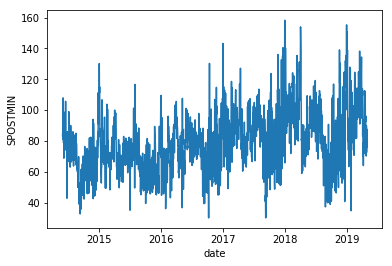

In [12]:
ax = sns.lineplot(x = avg.date, y = avg.SPOSTMIN )


In [13]:
disney_data['DATE'] = pd.to_datetime(disney_data['DATE'])
#merge back with original meta set for daily weighted averages
meta_dwarf2 = pd.merge(avg, disney_data, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [21]:
#fill na for new meta splash data
meta_dwarf2 = meta_dwarf2.fillna(0)
meta_dwarf2.head(n = 3)

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2014-05-28,83.371212,0,4,147,21,5,2014,SPRING,3,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
1,2014-05-29,85.463918,0,5,148,21,5,2014,SPRING,4,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
2,2014-05-30,81.181818,0,6,149,21,5,2014,SPRING,5,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


#### Week of the Year

In [16]:
week_avg = meta_dwarf2.groupby("WEEKOFYEAR")["SPOSTMIN"].mean()
week_avg = week_avg.reset_index()
week_avg = pd.DataFrame(week_avg,columns=['WEEKOFYEAR','SPOSTMIN'])

[Text(0, 0.5, 'Average Attendance by Minute'),
 Text(0.5, 0, 'Week of the Year')]

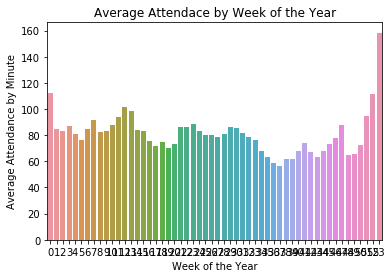

In [17]:
ax = sns.barplot(x = "WEEKOFYEAR", y = "SPOSTMIN", data = week_avg)
ax.set_title("Average Attendace by Week of the Year")
ax.set(xlabel='Week of the Year', ylabel='Average Attendance by Minute')

#### Wait Time vs Temperature

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

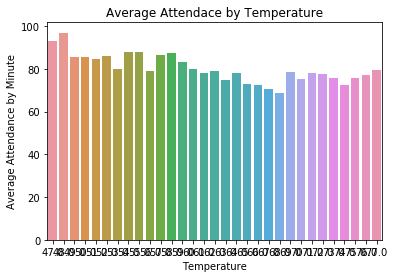

In [32]:
meta_dwarf2.WDWMINTEMP_mean = meta_dwarf2.WDWMINTEMP_mean.round()
avg_temp = meta_dwarf2.groupby("WDWMINTEMP_mean")["SPOSTMIN"].mean()
avg_temp = avg_temp.reset_index()
avg_temp = pd.DataFrame(avg_temp,columns=['WDWMINTEMP_mean','SPOSTMIN'])


ax = sns.barplot(x = "WDWMINTEMP_mean", y = "SPOSTMIN", data = avg_temp)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

#### Calculate park hours for the day and see if different park hours effect wait time

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

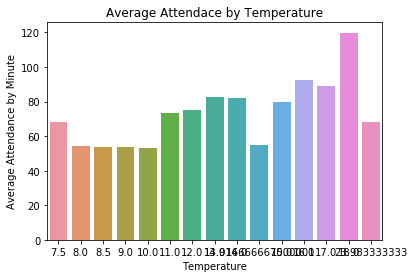

In [48]:
park_hour_df = meta_dwarf2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]

park_hour_df = park_hour_df.groupby("MKHOURS")["SPOSTMIN"].mean()
park_hour_df = park_hour_df.reset_index()
park_hour_df.head(n=3)
#park_hour_df = pd.DataFrame(avg_temp,columns=['MKHOURS','SPOSTMIN','SEASON'])


ax = sns.barplot(x = "MKHOURS", y = "SPOSTMIN", data = park_hour_df)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')